CASE 1

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = "Snow1.xlsx"

data = pd.read_excel(filename, usecols=[0,1,2], skiprows = 3, index_col=0 )
data.columns = ["Precipitation", "Temperature"]
data.head()

,Precipitation,Temperature
1985-10-01,9.4000,13.0
1985-10-02,0.5875,11.0
1985-10-03,4.5825,9.5
1985-10-04,12.2200,6.5
1985-10-05,6.1100,5.4


In [3]:
Er = 700 #elevation [m]
T_th = -0.5 #threshold temp [°C]
F_M = 3 #melt factor [mm/°C*d]
N = len(data["Precipitation"])

S_snow = np.zeros(N)
M = np.zeros(N)
T = data['Temperature']
P = data["Precipitation"]
Pr = np.zeros(N)
Pl = np.zeros(N)
Ps = np.zeros(N)

dt = 1




C:\Users\Unieuro\AppData\Local\Temp\ipykernel_29976\1423436173.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(T[i]<=T_th):
C:\Users\Unieuro\AppData\Local\Temp\ipykernel_29976\1423436173.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(T[i]>T_th):
C:\Users\Unieuro\AppData\Local\Temp\ipykernel_29976\1423436173.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pr[i] = P[i]
C:\Users\Unieuro\AppData\Local\Temp\ipykernel_2

<Axes: >

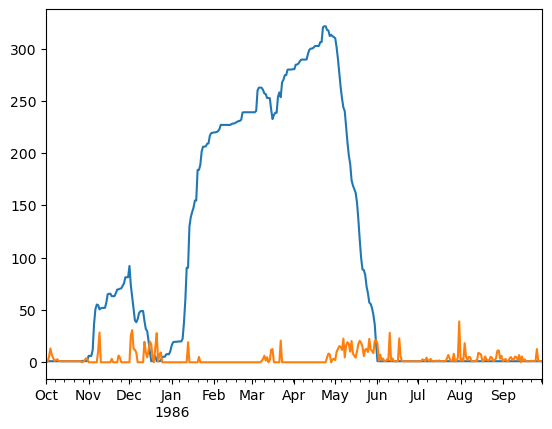

In [4]:
for i in np.arange(1 , N ,dt):
    if(T[i]<=T_th):
        Pr[i] = 0
        Ps[i] = P[i]
        S_snow[i] = S_snow[i-1] + Ps[i]*dt
    
    if(T[i]>T_th):
        Pr[i] = P[i]
        M[i] = np.minimum(S_snow[i-1]*dt, F_M*(T[i]- T_th))
        S_snow[i] = S_snow[i-1] - M[i]+dt 
        Pl[i] = Pr[i] + M[i]

data['Snow'] = S_snow
data['M'] = M
data['Pr'] = Pr
data['Pl'] = Pl
data['Ps'] = Ps

data['Snow'].plot()
data['Pl'].plot()

CASE 2

A catchment in a mountain region with elevation spanning from 0-2000m. This catchment has the
same mean and reference elevation as the above, i.e. ER = 700m, the same observed reference
temperatures TR at this elevation and it receives the same precipitation amount P. To estimate the
catchment total (i.e. weighted according to the area of each elevation band) SWE and P L,TOT, stratify
this catchment into 4 elevation bands (i.e. 0-500m, 500-1000m, 1000-1500m and 1500-2000m) with
mean elevations of E1=250m, E2=750m, E3=1250m and E4=1750m, respectively

C:\Users\Unieuro\AppData\Local\Temp\ipykernel_29976\1031065035.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T[i,j] = Tr2[i] - 0.6*(E[j]-Er)/100
C:\Users\Unieuro\AppData\Local\Temp\ipykernel_29976\1031065035.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pr[i] = P[i]
C:\Users\Unieuro\AppData\Local\Temp\ipykernel_29976\1031065035.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Ps[i] = P[i]


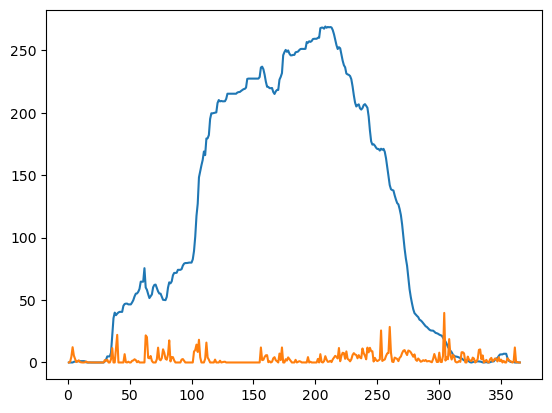

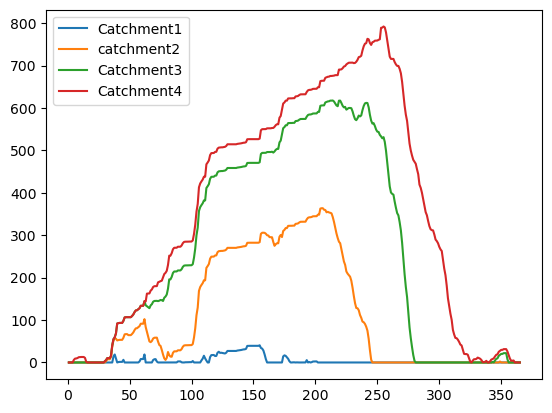

-16.4


In [5]:
E_1 = 250 #m
E_2 = 750 #m
E_3 = 1250 #m
E_4 = 1750 #m

A_1 = 5.1 #km^2
A_2 = 2.8 #km^2
A_3 = 2.2 #km^2
A_4 = 0.9 #km^2

E = np.array([E_1, E_2, E_3, E_4])
A = np.array([A_1, A_2, A_3, A_4])

S_snow2j = np.zeros([N,4])
S_snow2tot = np.zeros(N)
M2 = np.zeros([N,4])
Tr2 = data['Temperature']
T = np.zeros([N,4])
P2 = data["Precipitation"]
Pr2 = np.zeros(N)
Plj = np.zeros([N,4])
Pl_tot = np.zeros(N)
Ps2 = np.zeros(N)
f1 = A_1/(np.sum(A))
f2 = A_2/(np.sum(A))
f3 = A_3/(np.sum(A))
f4 = A_4/(np.sum(A))

for i in np.arange(1 , N ,dt):
    for j in np.arange(0,4):
        T[i,j] = Tr2[i] - 0.6*(E[j]-Er)/100
        if(T[i,j]<=T_th):
            Pr[i] = 0
            Ps[i] = P[i]
            S_snow2j[i,j] = S_snow2j[i-1,j] + Ps[i]*dt
            Plj[i,j] = 0

    
        if(T[i,j]>T_th):
            Pr[i] = P[i]
            M2[i,j] = np.minimum(S_snow2j[i-1,j]/dt, F_M*(T[i,j]- T_th))
            S_snow2j[i,j] = S_snow2j[i-1,j] - M2[i,j]*dt 
            Plj[i,j] = Pr[i] + M2[i,j]
    S_snow2tot[i] = f1*S_snow2j[i,0] + f2*S_snow2j[i,1] + f3*S_snow2j[i,2] +f4*S_snow2j[i,3]
    Pl_tot[i] = f1*Plj[i,0] + f2*Plj[i,1] + f3*Plj[i,2] +f4*Plj[i,3]

t = np.arange(1,N+1)

plt.plot(t,S_snow2tot)
plt.plot(t,Pl_tot)
plt.show()

plt.plot(t, S_snow2j, label = ['Catchment1', 'catchment2', 'Catchment3', 'Catchment4'])
plt.legend()
plt.show()
print(np.min(T[:,3]))

In [6]:
data2 = pd.read_excel(filename, usecols=[0,3,4], skiprows = 3, index_col=0 )
data2.columns = ["Precipitation", "Temperature"]
data2.head()

,Precipitation,Temperature
1985-10-01,9.4000,15.0
1985-10-02,0.5875,13.0
1985-10-03,4.5825,11.5
1985-10-04,12.2200,8.5
1985-10-05,6.1100,7.4


In [7]:
Tr2 = data2['Temperature']
P2 = data2['Precipitation']

C:\Users\Unieuro\AppData\Local\Temp\ipykernel_29976\2076398073.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T[i,j] = Tr2[i] - 0.6*(E[j]-Er)/100
C:\Users\Unieuro\AppData\Local\Temp\ipykernel_29976\2076398073.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pr[i] = P[i]
C:\Users\Unieuro\AppData\Local\Temp\ipykernel_29976\2076398073.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Ps[i] = P[i]


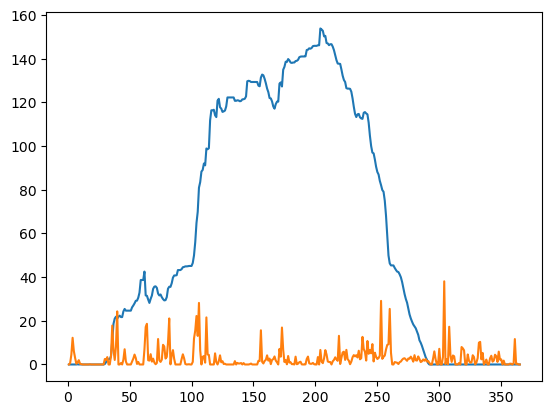

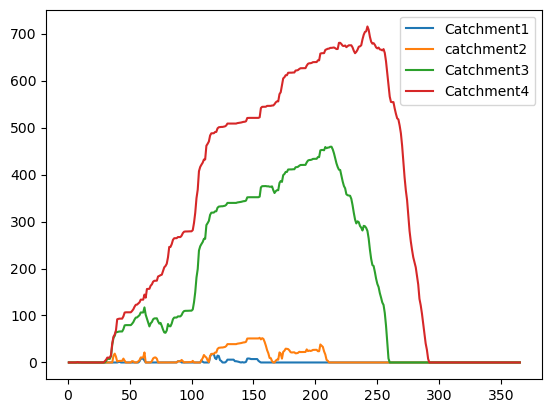

In [8]:
for i in np.arange(1 , N ,dt):
    for j in np.arange(0,4):
        T[i,j] = Tr2[i] - 0.6*(E[j]-Er)/100
        if(T[i,j]<=T_th):
            Pr[i] = 0
            Ps[i] = P[i]
            S_snow2j[i,j] = S_snow2j[i-1,j] + Ps[i]*dt
            Plj[i,j] = 0

    
        if(T[i,j]>T_th):
            Pr[i] = P[i]
            M2[i,j] = np.minimum(S_snow2j[i-1,j]/dt, F_M*(T[i,j]- T_th))
            S_snow2j[i,j] = S_snow2j[i-1,j] - M2[i,j]*dt 
            Plj[i,j] = Pr[i] + M2[i,j]
    S_snow2tot[i] = f1*S_snow2j[i,0] + f2*S_snow2j[i,1] + f3*S_snow2j[i,2] +f4*S_snow2j[i,3]
    Pl_tot[i] = f1*Plj[i,0] + f2*Plj[i,1] + f3*Plj[i,2] +f4*Plj[i,3]

t = np.arange(1,N+1)

plt.plot(t,S_snow2tot)
plt.plot(t,Pl_tot)
plt.show()

plt.plot(t, S_snow2j, label = ['Catchment1', 'catchment2', 'Catchment3', 'Catchment4'])
plt.legend()
plt.show()
